### Урок 6. Задача lookalike (Positive Unlabeled Learning)

Программа урока:
1. Теоретическая часть:

     - Задача обучения с учителем (повторение)
     - Примеры кейсов, когда разметка содержит только наблюдения положительного класса
     - Какие задачи не относятся к lookalike


2. Практическая часть
    - Метод решения random negative sampling
    - Метод 2-step approach
    - Метод spy
    - Сравнение методов между собой на датасете, для которого метки известны
    - Сравнение лучшего метода с моделью, построенной на данных, для которых известны метки всех классов

![ab_split](Data/supervised_learning.png "churn1")

Т.е в "стандартной" постановке задачи обучения с учителем у нас есть разметка.

Например, если мы решаем задачу бинарной классификации, то у нас есть объекты с метками обоих классов (positive/negative).

На практике часто бывает так, что мы сравнительно легко можем определить объекты одного класса (дпопустим, мы легко понимаем, какие объекты можно назвать положительными), но при этом возникают сложности с определением объектов другого класса (негативы).

Речь идет именно о формировании датасета!

Примеры задач:

- Продвижение услуг и приложений
- Выделение сегмента пользователей, которые совершат нужное нам целевое действие

Отдельный момент - каналы взаимодействия с пользователями (смс, пуши, реклама в соцсетях, звонки и т.д)

#### Какие задачи не относятся к PU Learning

- Small-training dataset
- Outlier detection

#### Поиск выбросов

![ab_split](Data/outlier.png "outliers")

#### Пример задачи

![ab_split](Data/example1.png "example1")

Пример: есть сегмент пользователей, которым нравится футбол. Мы хотим находить "похожих".

Возможное (очевидное) решение - построить бинарный классификатор, который будет отличать тех, кому нравится футбол от тех, кому он не нравится.

Проблема - нет понимания что считать "негативами"

Чуть ближе к ML

![ab_split](Data/example2.png "example2")

### Более формальное описание задачи

1. оценивается вероятность того, что пользователь совершит некоторое целевое действие (приобретение подписки, установка или регистрация в приложении и т.д)
2. У нас есть только те, кто совершил это действие - это positives. При этом нет определения того, что такое negative. Все, кроме P - (U)
3. Нам нужно как-то собрать выборку и обучить модель, которая будет отличать P от N 

Получаем такие обозначения: P, U, N (в начале есть только первые 2)

Еще пример

![ab_split](Data/example3.png "example3")

### Пример

- Есть «хорошие» пользователи, совершившие целевое действие - P
- Для них мы храним логи + дополнительную информацию
- Также у нас есть хранилище признаков для каждого пользователя
- Все, что не P, относится к неразмеченным - U


Задача: построить модель, которая будет определять степень принадлежности пользователя x к P (вероятность p(y=1|x) или что-то вроде)

Мы не будем рассматривать варианты с обучением без учителя (теоретически вполне себе возможно)

Выводы:

Обучение на PU данных нетривиально. Существует 2 возможных объяснения, почему конкретный объект не имеет метки класса:
1. это объект класса 0 (True negative)
2. это объект класса 1, но просто неразмеченный

### PU learning (варианты решения)

1. Random negative sampling
2. 2-step approach
3. SPY
4. … (много других)

Другие обозначения:

1. random negative sampling -> The Selected Completely At Random (SCAR)


### 1. Random negative sampling

![ab_split](Data/pu_random.png "PU random")

### 2-step approach

![ab_split](Data/pu_2step.png "PU 2-step")

#### Или словами:

1. определяем RN (reliable negatives). Здесь же бывают алгоритмы, в которых также размечаются дополнительно positives из множества Unlabeled (U). 
2. Используем метод обучения с учителем (на самом деле, не совсем - это называется semi-supervised) для обучения классификатора на P, RN
3. (когда применимо) Выбирается лучший классификатор с шага 2

### 3. алгоритм Spy

![ab_split](Data/pu_spy.png "PU Spy")

#### Небольшие пояснения

- random negative sampling основан на предположении, что размеченные данные являются iid выборкой из множества положительных примеров

iid - Independent and identically distributed (примеры независимы и одинаково распределены)

- random negative sampling очень популярен, но главным образом благодаря тому, что проблема в итоге сводится к задаче бинарной классификации

Ниже на картинке пример, если размеченные данные (Labeled Positive) выбраны независимо и равновероятно из генеральной совокупности (множества всех позитивов - Unlabeled Positive)

![ab_split](Data/PU_SCAR.png "PU SCAR")

Ниже на картинке пример, где мы уже видим, что семплирование смещено. 

![ab_split](Data/PU_SAR.png "PU SAR")

#### Есть и более простой способ - разметить все неразмеченные данные как Negatives!

Но конечно такой метод на практике почти не используется, хотя и очень прост и понятен.

### Ссылки

1. https://arxiv.org/pdf/1811.04820.pdf

### Пример

1. сгенерируем игрушечный датасет из двух множеств так, чтобы они немного пересекались с помощью https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [1]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve

2. Нарисуем график с нашими и данными. Часть данных (250 примеров) размечена как позитивы, остальные - неразмечены

labeled samples: 250


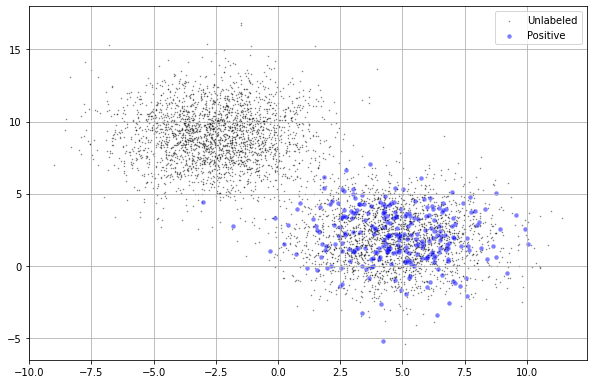

In [3]:
N = 5000
known_labels_ratio = 0.1
X, y = make_blobs(n_samples=N, centers=2, 
                  n_features=2, shuffle=True, 
                  cluster_std=2.0, random_state=42)
rp = np.random.permutation(int(N/2))
data_P = X[y==1][rp[:int(len(rp)*known_labels_ratio)]]
data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
print("labeled samples: %d" % (data_P.shape[0]))
plt.figure(figsize=(10, 6.5))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', linewidth=1, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', linewidth=0, s=20, alpha=0.5, label='Positive')
plt.grid()
plt.legend()

3. Обучим 1000 деревьев решений, используя bagging
4. Предсказания делаем oob (out-of-the-bag) и затем для каждого примера мы все прогнозы усредняем

Что такое bagging (ссылка - https://en.wikipedia.org/wiki/Bootstrap_aggregating)

![ab_split](Data/bagging.png "bagging")

In [4]:
NP = data_P.shape[0]
NU = data_U.shape[0]

T = 1000
K = NP
train_label = np.zeros(shape=(NP+K,))
train_label[:NP] = 1.0
n_oob = np.zeros(shape=(NU,))
f_oob = np.zeros(shape=(NU, 2))
for i in range(T):
    # Bootstrap resample
    bootstrap_sample = np.random.choice(np.arange(NU), replace=True, size=K)
    # Positive set + bootstrapped unlabeled set
    data_bootstrap = np.concatenate((data_P, data_U[bootstrap_sample, :]), axis=0)
    # Train model
    model = DecisionTreeClassifier(max_depth=None, max_features=None, 
                                   criterion='gini', class_weight='balanced')
    model.fit(data_bootstrap, train_label)
    # Index for the out of the bag (oob) samples
    idx_oob = sorted(set(range(NU)) - set(np.unique(bootstrap_sample)))
    # Transductive learning of oob samples
    f_oob[idx_oob] += model.predict_proba(data_U[idx_oob])
    n_oob[idx_oob] += 1
predict_proba = f_oob[:, 1]/n_oob

5. наконец, посчитаем Precision, Recall и оптимальный порог и посмотрим, как наш алгоритм справился (ведь мы для наших данных знаем реальные метки классов)

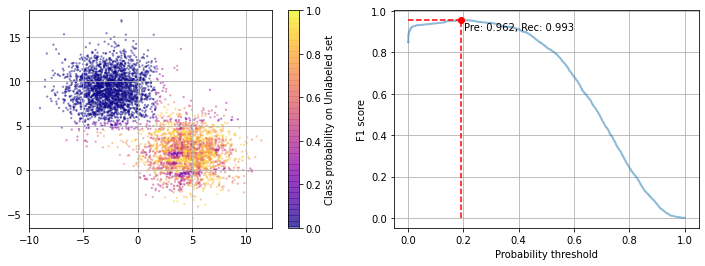

In [5]:
# Plot the class probabilities for the unlabeled samples
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
sp= ax1.scatter(data_U[:, 0], data_U[:, 1], c=predict_proba, 
                linewidth=0, s=5, alpha=0.5, cmap=plt.cm.plasma, label='unlabeled')
plt.grid()
plt.colorbar(sp, label='Class probability on Unlabeled set')

true_labels = np.zeros(shape=(data_U.shape[0]))
true_labels[:int(len(rp)*(1.0-known_labels_ratio))] = 1.0
precision, recall, th = precision_recall_curve(true_labels, predict_proba)
ax2 = fig.add_subplot(1, 2, 2)
f1s = precision[:-1]*recall[:-1]
ax2.plot(th, f1s, linewidth=2, alpha=0.5)
best_th = np.argmax(f1s)
ax2.plot(th[best_th], f1s[best_th], c='r', marker='o')
ax2.plot([th[best_th], th[best_th]], [0.0,f1s[best_th] ], 'r--')
ax2.plot([0.0, th[best_th]], [f1s[best_th], f1s[best_th] ], 'r--')
ax2.annotate('Pre: %0.3f, Rec: %0.3f' %(precision[best_th], recall[best_th]), 
             xy=(th[best_th]+ 0.01, f1s[best_th]-0.05))
ax2.set_ylabel('F1 score')
ax2.set_xlabel('Probability threshold')
plt.grid()


### Ссылки (еще раз):

1. https://arxiv.org/pdf/1811.04820.pdf
2. https://habr.com/ru/company/JetBrains-education/blog/512032/
3. https://en.wikipedia.org/wiki/Bootstrap_aggregating
4. https://www.cs.uic.edu/~liub/publications/EMNLP-2010-no-negative.pdf